<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 10.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [2]:
# insert code here
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_diabetes
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import losses

### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [3]:
# insert code here
diabetes = load_diabetes()

In [4]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

### Prepare input data

In [58]:
# insert code here
X = diabetes.data
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [59]:
# Target
y = diabetes.target
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [60]:
# print the type of X to check that it is a numpy array
print("X is a ", type(X))

# Print shape to check rows and columns
print("X has {} rows and {} columns".format(X.shape[0], X.shape[1]))

# Save number of columns as n_cols
n_cols = X.shape[1]

print("First 10 values in y: ", y[:10])

X is a  <class 'numpy.ndarray'>
X has 442 rows and 10 columns
First 10 values in y:  [151.  75. 141. 206. 135.  97. 138.  63. 110. 310.]


### Split the data (training/test)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.3,
    random_state = 65)

### Compile the model

In [62]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [63]:
model = Sequential()
# Add the first hidden layer
model.add(Dense(15, activation = 'linear', input_shape = (n_cols, )))
# Add the second hidden layer
model.add(Dense(5, activation = 'relu'))

# Add the output layer
model.add(Dense(1, activation = 'softmax'))

In [64]:
print(model.summary())

Model: "sequential_409"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1224 (Dense)           (None, 15)                165       
_________________________________________________________________
dense_1225 (Dense)           (None, 5)                 80        
_________________________________________________________________
dense_1226 (Dense)           (None, 1)                 6         
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________
None


### Create the model's architecture

In [65]:
#model.compile?

In [66]:
# Compile the model
model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mse'])

### Fit the training data

In [67]:
# shuffle training data
from sklearn.utils import shuffle
X_train2, y_train2 = shuffle(X_train, y_train, random_state=42)

In [68]:
%%time
# Fit the model
history = model.fit(
    X_train2,
    y_train2,
    validation_split = 0.25,
    batch_size = 10,
    epochs = 1000,
    verbose = 0)

Wall time: 1min 9s


### Create predictions

In [69]:
# insert code here
predictions = model.predict(X_test)

In [70]:
predictions.shape

(133, 1)

### Evaluate the model

In [71]:
# Calculate test MSE
score = model.evaluate(X_test, y_test)
print('\nTest loss: %.6f' % score[0])

5/5 [==============================] - 0s 1ms/step - loss: 29887.6699 - mse: 29887.6699

Test loss: 29887.669922


In [72]:
# Find RMSE
# insert code here
score[0] ** (1/2)

172.88050764003154

### Visualisation of cost

In [73]:
# insert code here
history.history

{'loss': [28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  28451.84765625,
  

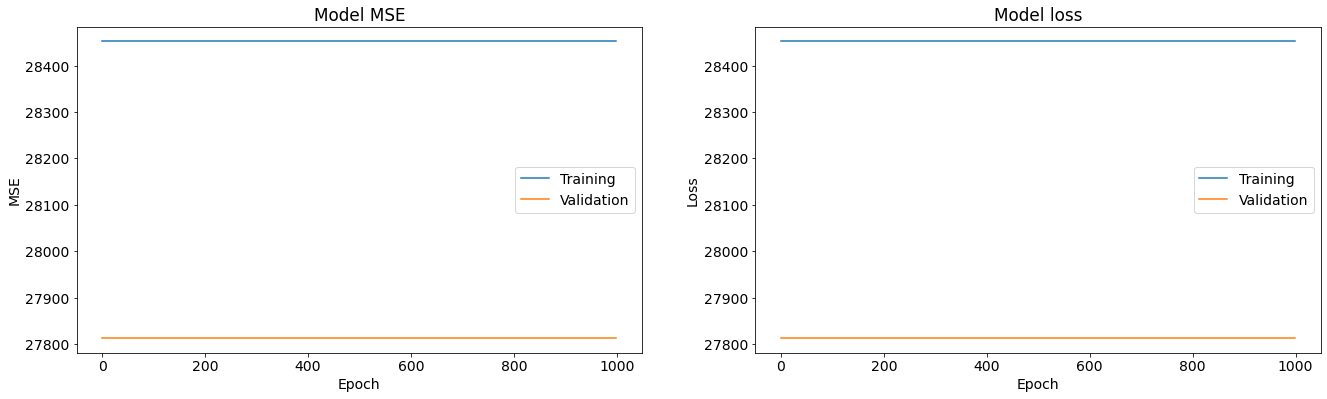

In [74]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 14})

# Plot training & validation accuracy values
ax[0].plot(history.history['mse'], label = 'Training')
ax[0].plot(history.history['val_mse'], label = 'Validation')
ax[0].set_title('Model MSE')
ax[0].set_ylabel('MSE')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(history.history['loss'], label = 'Training')
ax[1].plot(history.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

### Visualisation of residuals

In [75]:
# insert code here
# Calculate R2 and adjusted R2
r2 = r2_score(y_test, predictions)
n, p = X.shape # sample size, number of explanatory variables
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

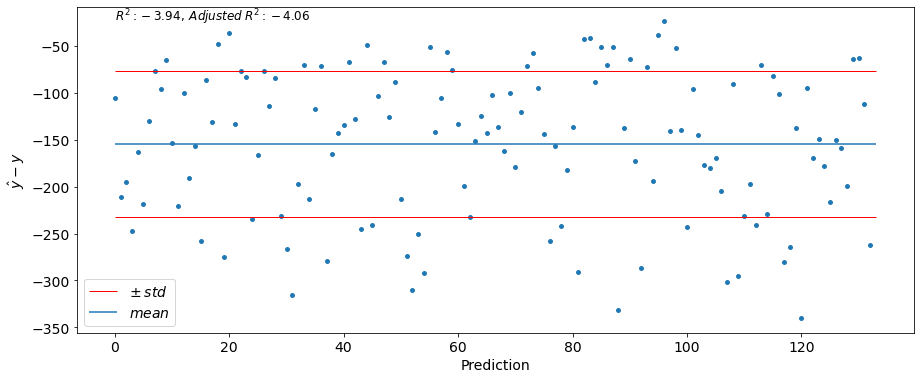

In [76]:
difference = predictions.flatten() - y_test
d_mean = difference.mean()
d_std = difference.std()
n_pred = len(predictions)
plt.figure(figsize = (15, 6))
plt.scatter(range(n_pred), difference, s = 15)
plt.hlines(d_mean + d_std, 0, n_pred, 'r', lw = 1, label = '$\pm \: std$')
plt.hlines(d_mean, 0, n_pred, label = '$mean$')
plt.hlines(d_mean - d_std, 0, n_pred, 'r', lw = 1)
plt.xlabel('Prediction')
plt.ylabel('$\hat y - y$')
plt.legend()
plt.text(0, difference.max() * 0.95,
         '$R^2: %.2f, \: Adjusted \: R^2: %.2f$' % (r2, adjusted_r2),
         fontsize = 12)
plt.show()



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



